# Wine Quality Classification

### Problem Description

- The dataset is sourced from Kaggle. The original data comes from UCI's Machine Learning Repository.
- The dataset is related to the red variants of a Porteguese wine called "Vinho Verde".
- The dataset has 11 features relating to the predictor variable: `quality`. These features describe the exact amount of various chemicals present in the wine and the effect they have on it's `quality`. 
- The `quality` column contains a score between 0 and 10 as graded by a wine expert. This is a categorical data type, i.e. each value has some kind of relative position.
- Therefore, the problem we have here is to predict the quality of the wine based on its various features. This is a **multi-class classification** problem.
- This report will follow the following structure
    - Load the libraries & datasets
    - Perform some exploratory data analysis
    - Evaluate various modelling techniques
    - Present the "best" model
    - Discuss next steps

#### Data Fields

**Features**
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

**Predictor**
- Quality: A score between 0 and 10

### Load in the libraries & dataset

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style()

In [ ]:
df = pd.read_csv("wine_quality.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


- Let's drop the `Id` column from the dataset since it's useless for analysis & modelling purposes.

In [ ]:
df = df.drop(columns=['Id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- There are no null values in the dataset
- Since there are over 1.1k samples in the dataset, we have more than enough data points to split this data into training & test sets.

In [ ]:
sorted(df["quality"].unique())

[3, 4, 5, 6, 7, 8]

In [ ]:
df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

- The wines are rated between 1 to 10
- But the values in the dataset range between 3 and 8 only.

In [ ]:
list_features = [x for x in df.columns[:-1]] # The last column is quality which is our target variable
print(f"Total # of features in this dataset: {len(list_features)}")
print(list_features)

Total # of features in this dataset: 11
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


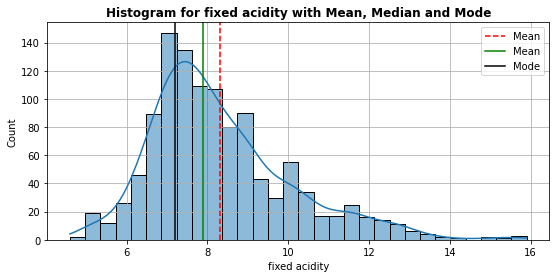

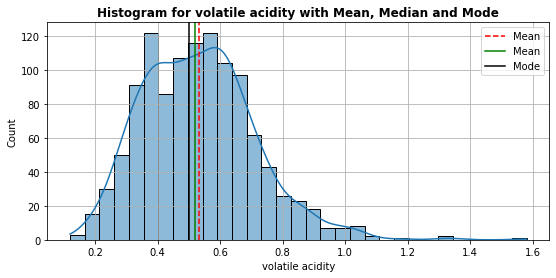

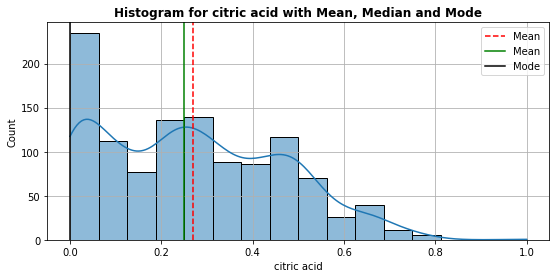

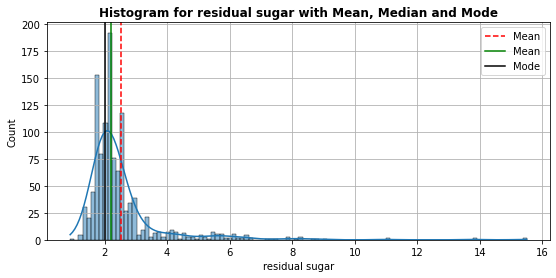

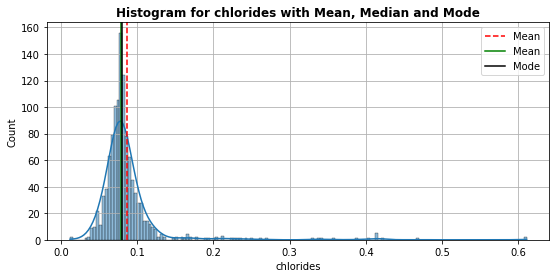

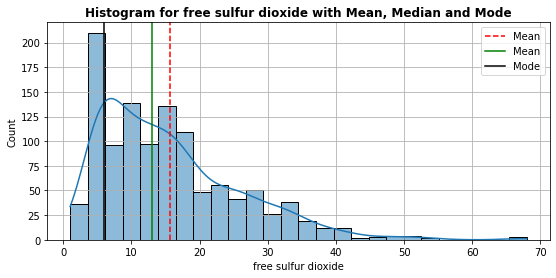

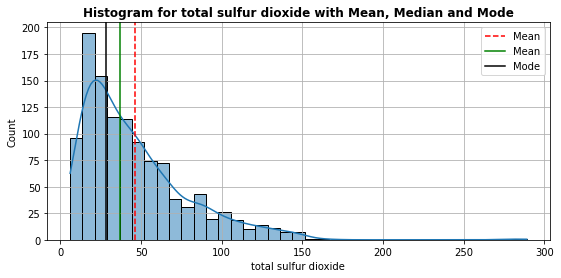

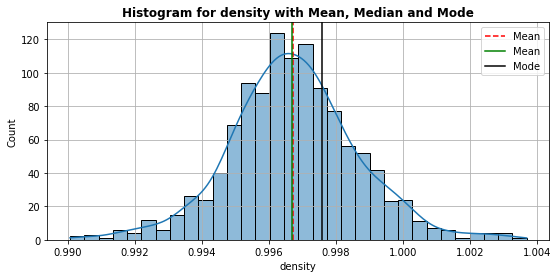

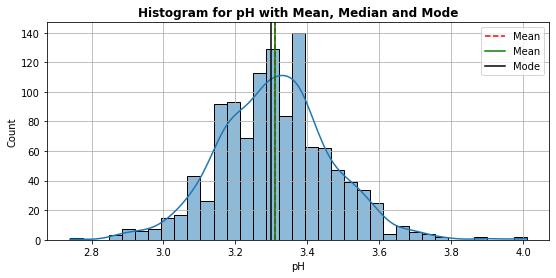

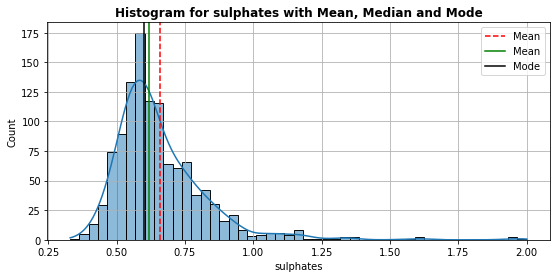

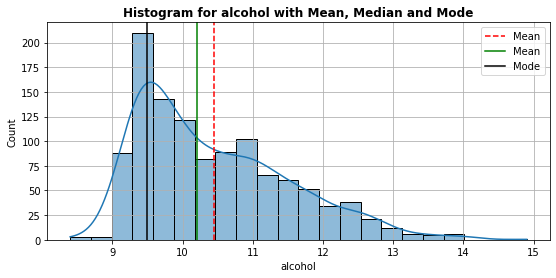

In [ ]:
for feature in list_features:
    f, ax = plt.subplots(1, 1, figsize=(9, 4))
    sns.histplot(df[feature], ax=ax, kde=True)

    mean=df[feature].mean()
    median=df[feature].median()
    mode=df[feature].mode().values[0]

    ax.axvline(mean, color='r', linestyle='--', label="Mean")
    ax.axvline(median, color='g', linestyle='-', label="Mean")
    ax.axvline(mode, color='black', linestyle='-', label="Mode")
    ax.legend()
    plt.grid()
    plt.title(f"Histogram for {feature} with Mean, Median and Mode", fontweight='bold')

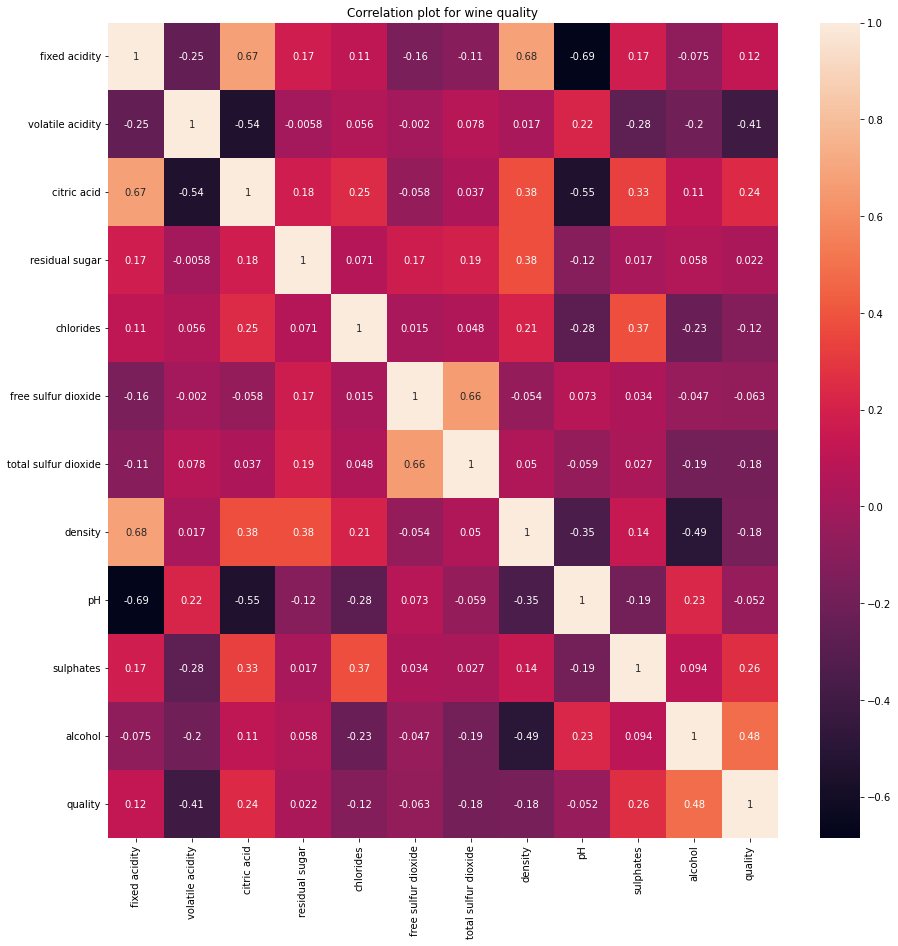

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation plot for wine quality")
plt.show()

- `volatile acidity` and `alcohol` seems to have the highest correlation with `quality`

### Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

- Extract features and response variables into X & y respectively

In [ ]:
X = df.drop(['quality'], axis = 1)
y = df['quality'].values

- Split our dataset into training and test sets
- The test set represents 25% of the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (857, 11)
Shape of X_test: (286, 11)
Shape of y_train: (857,)
Shape of y_test: (286,)


- Since models like `SVM` & `Logistic Regression` from scaling of the features, let's normalize our training & test datasets
- Best practices dictate that the scaler should only be fit to the training data instead of the whole dataset. This way no information about the test set is leaked into the training set. 
- We'll be using the MinMaxScaler from sklearn to scale the features between `[0, 1]`.

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X_train)

X_train_scaled, X_test_scaled = scaler_x.transform(X_train), scaler_x.transform(X_test)

In [ ]:
print(f'Shape of X_train_scaled: {X_train_scaled.shape}')
print(f'Shape of X_test_scaled: {X_test_scaled.shape}')

Shape of X_train_scaled: (857, 11)
Shape of X_test_scaled: (286, 11)


In [ ]:
def model_tester(model, model_name):
    print(f"Currently evaluating: {model_name}")

    print("\nTraining the model\n")
    model.fit(X_train_scaled, y_train)

    print("Evaluating the model")
    y_pred = model.predict(X_test_scaled)

    # print("Classification Report of the model:")
    # print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"\tAccuracy: {acc}")
    print(f"\tF1 Score: {f1}")

In [ ]:
mod1 = LogisticRegression(random_state=42)
model_tester(mod1, "Logistic Regression")

Currently evaluating: Logistic Regression

Training the model

Evaluating the model
	Accuracy: 0.6293706293706294
	F1 Score: 0.6053084483130161


In [ ]:
mod3 = DecisionTreeClassifier(max_features="auto", random_state=42)
model_tester(mod3, "Decision Tree")

Currently evaluating: Decision Tree

Training the model

Evaluating the model
	Accuracy: 0.5524475524475524
	F1 Score: 0.5517415452676521


In [ ]:
mod5 = RandomForestClassifier(max_features="auto", random_state=42)
model_tester(mod5, "Random Forest Tree")

Currently evaluating: Random Forest Tree

Training the model

Evaluating the model
	Accuracy: 0.6783216783216783
	F1 Score: 0.6662718197484052


In [ ]:
mod7 = SVC(random_state=42)
model_tester(mod7, "SVC")

Currently evaluating: SVC

Training the model

Evaluating the model
	Accuracy: 0.6188811188811189
	F1 Score: 0.5891400016072059


In [ ]:
mod8 = KNeighborsClassifier()
model_tester(mod8, "KNeighbors Classifier")

Currently evaluating: KNeighbors Classifier

Training the model

Evaluating the model
	Accuracy: 0.5699300699300699
	F1 Score: 0.5579240909256624


#### Summary of the models generated above

- Logistic Regression: 62.94%
- Decision Tree: 55.24%
- Random Forest: 67.83%
- SVC: 61.89%
- K Neighbor Classifier: 56.99%

Since the Random Forest Classifier performed the best with the default options, we will now try and optimize the hyperparameters to squeeze even more accuracy out of this model.


#### Optimizing the hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [2, 4, 8]
}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1, verbose=4)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 8],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=4)

### Results

In [ ]:
clf.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 100}

In [ ]:
accuracy_score(clf.best_estimator_.predict(X_test), y_test)

0.6853146853146853

- Accuracy achieved by the best model found via grid search: 68.53%
- This is only marginally better than the accuracy of the model we created before. 

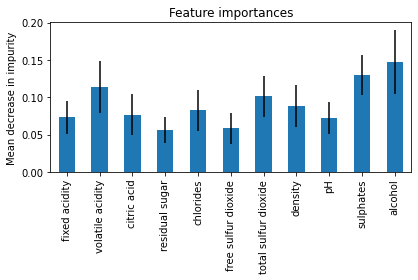

In [ ]:
forest_importances = pd.Series(clf.best_estimator_.feature_importances_, index=list_features)
std = np.std([tree.feature_importances_ for tree in clf.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

- The most important features for predicting the quality of the wine are `alcohol` and `sulphates`
- Whereas the least important feature is `residual sugar`

### Conclusion

- Based on the analysis done above, I would like to try some more advanced modelling techniques such as:
    - XGBoost
    - Neural Networks
- The overall accuracy achieved by the best model is ~ 70%. This isn't *too bad* by most standards. I believe this can definitely be improved by either expanding the parameters in grid search, or better yet, by evaluating some of the more advanced modelling techniques discussed above. 
- It's important to remember that these scores were given out by wine experts so we should definitely expect some kind of bias in them. These scores are highly subjective and are not based in some sort of *objective truth*. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb782642-0f0c-4b76-a1f5-ad2f64b15eba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>